In [1]:
# Initialize Otter Grader
import otter
grader = otter.Notebook()

![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

___

#### NAME: Tianhao Wu

#### STUDENT ID: 3032835678
___


#  HW1: Bootcamp Review 

<br>

Run the following cell to load the required modules.

In [2]:
## Load the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The dataset for this homework is based on https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings. **Please read the Kaggle page for the complete description of the dataset.** We've replaced the column name "Platform" with "Console" to avoid a conflict due to dummy variables generations (see 3.c).

We start by loading the dataset with pandas.

In [3]:
## No need for modification, just run this cell
df = pd.read_csv("HW1_dataset.csv")
df.head(5)

,Name,Console,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<br>

## 1. Examining Data Integrity and Data Cleaning

<br>

### 1.a Data Type Conversion

<br>

First, we examine the data type of each column. Are there any columns with unexpected data types? (You don't need to write any answers.) 

In [4]:
## No need for modification, just run this cell
df.dtypes

Name                object
Console             object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

**1.a.1)** According to the content, "User_Score" would be more useful if represented as "float64", but its type is "object" instead. Try to manually fix this by 
- Coercing the data type of the "User_Score" column to float64.
- If there are any entries that can not be converted to numerics (e.g. you might have noticed some entries being "tbd", which is why pandas could not convert them into numerics.) interpret them as missing values. 

**Hint: Select the right option for the "errors" argument when converting the values [to numeric](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html#pandas.to_numeric).**

*Remeber to store the converted column back to ```df["User_Score"]```.*

<!--
BEGIN QUESTION
name: q1a1
manual: false
points: 4
-->

In [5]:
## Your code here
df['User_Score'] = pd.to_numeric(df["User_Score"], errors='coerce')

In [6]:
grader.check("q1a1")

q1a1 passed!

### 1.b Missing Values and Duplicated Entries

<br>

**1.b.1)** How many [missing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) are there for each column? Store the answer in a pandas Series (name the variable ```s_nacount```) that is 
- indexed by the column name of the dataset, and
- the corresponding value field stores NaN counts

<!--
BEGIN QUESTION
name: q1b1
manual: false
points: 4
-->

In [7]:
## Your code here
s_nacount = df.isna().sum()
s_nacount

Name                  2
Console               0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
grader.check("q1b1")

q1b1 passed!

**1.b.2)** Drop all the rows from df that contain missing values. After the operation, df should contain the same column as before but has no NaN in any entries.

<!--
BEGIN QUESTION
name: q1b2
manual: false
points: 4
-->

In [9]:
## Your code here
df=df[~df.isnull().any(axis=1)]

In [10]:
grader.check("q1b2")

q1b2 passed!

**1.b.3)** Find out how many duplicated entries the dataset contains. Store the number of [duplicated entries](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) in the variable ```num_duplicated```. If there are **any duplicated entries, drop them** from the dataframe df.

<!--
BEGIN QUESTION
name: q1b3
manual: false
points: 4
-->

In [11]:
## Your code here
num_duplicated=df.duplicated().sum()
print(num_duplicated)

0


In [12]:
grader.check("q1b3")

q1b3 passed!

### 1.c Data Sanity Checks

<br>

**1.c.1)** It is important to check if there are any internal inconsistencies within the dataset. One natural question to ask would be: are "Global_Sales" consistent with the regional sales? That is, are the sums of "NA_Sales", "EU_Sales", "JP_Sales", and "Other_Sales" equal to "Global_Sales" for all entries? Examine this problem by:

1. Creating a new column in df named **"Total_Sales"** which contains the summation of the columns "NA_Sales", "EU_Sales", "JP_Sales", and "Other_Sales".
2. Calculating the [absolute](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.abs.html) **difference between "Total_Sales" and "Global_Sales"** for each entry, and report the largest value of the absolute difference.

Store the maximal deviation in a new variable named ```maxdeviation```.

Is maxdeviation 0? If not, what are the possible reasons? Is the dataset still acceptible despite nonzero deviations? (You don't need to write any answers)

<!--
BEGIN QUESTION
name: q1c1
manual: false
points: 4
-->

In [13]:
## Your code here
# Create new Total_sales column, which is sum of sales column by row.
#df.columns
df['Total_Sales']=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
maxdeviation = (df['Global_Sales']-df['Total_Sales']).abs().max()
print("The max deviation between \"Total_Sales\" and \"Global_Sales\" is", maxdeviation)

The max deviation between "Total_Sales" and "Global_Sales" is 0.020000000000000462


In [14]:
grader.check("q1c1")

q1c1 passed!

**1.c.2)** Recall that we have removed all duplicated entries from the dataframe, but we still want to make sure there is no subtle web scraping issues such as misspellings that prevent redundant entries from being removed.

Does each entry represent one unique game? This question can be divided into two parts.

- How many entries (rows) are there in the dataframe now? Store answer (an integer) in a variable named ```len_total```.
- How many distinct game names (in the column **"Name"**) are there in the dataset? Store the integer result in a variable named ```len_name_unique```.

Each entry represents one unique game if and only if the two numbers are equal.

<!--
BEGIN QUESTION
name: q1c2
manual: false
points: 4
-->

In [15]:
## Your code here
len_total = df.shape[0]
len_name_unique = df['Name'].unique().shape[0]
print ("The number of non-duplicative entries is", len_total)
print ("The number of distinct game names is", len_name_unique)
print ("The two numbers are {0}".format("equal" if len_total==len_name_unique else "not equal") )

The number of non-duplicative entries is 6825
The number of distinct game names is 4377
The two numbers are not equal


In [16]:
grader.check("q1c2")

q1c2 passed!

**1.c.3)** To take a deeper look into the structure of the dataset, 
1. Create a subset of the DataFrame containing only entries of which the game names appear more than once among all entries.
2. [Sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) the new DateFrame according to the Name **alphabetically in ascending order**.

**Hint:  [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [pandas.core.groupby.DataFrameGroupBy.filter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html) may be useful for the tasks in 1. For concrete illustrations and usages, see [the Data100 Lecture](http://www.ds100.org/fa20/lecture/lec06/).**

Store the result into ```df_name_multi_sorted```. This practice is intended to address why there are duplicated game names.

<!--
BEGIN QUESTION
name: q1c3
manual: false
points: 4
-->

In [17]:
## Your code here
df_name_multi_sorted=df.groupby('Name').filter(lambda x: len(x) > 1).sort_values(by='Name', ascending=True)
df_name_multi_sorted.head(5)

,Name,Console,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales
1285,007: Quantum of Solace,X360,2008.0,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,1.48
1785,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.51,0.02,0.19,1.14,65.0,42.0,6.6,47.0,Treyarch,T,1.15
3120,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.29,0.28,0.01,0.07,0.65,54.0,11.0,7.5,26.0,Treyarch,T,0.65
14660,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0.00,0.00,0.03,70.0,18.0,6.3,55.0,Treyarch,T,0.02
4805,18 Wheeler: American Pro Trucker,PS2,2001.0,Racing,Acclaim Entertainment,0.20,0.15,0.00,0.05,0.40,61.0,11.0,5.7,18.0,Acclaim Studios Cheltenham,E,0.40


In [18]:
grader.check("q1c3")

q1c3 passed!

**<font color='blue'>Important: Before proceeding to the following sections, please make sure you have passed the tests for problems in 1.b. This will ensure df is ready for the following analyses.</font>**

## 2. Exploring the data

<br>

**2.1)** Observe the histogram of the global sales plotted below and try to reproduce it. Specs of the plot:

  >1. plot title: 'Histogram of Global Sales'
  >2. x-label: 'Global Sales (in millions of unit)'
  >3. y-label: 'Count'
  >4. bins=np.arange(0, 10, 0.5)

<img src="./Histogram of Global Sales.png">

<!--
BEGIN QUESTION
name: q21
manual: false
points: 0
-->


Text(0, 0.5, 'Count')

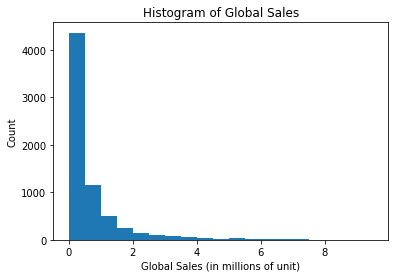

In [19]:
## your code here
plt.hist(df['Global_Sales'],bins=np.arange(0, 10, 0.5))
plt.title('Histogram of Global Sales')
plt.xlabel('Global Sales (in millions of unit)')
plt.ylabel('Count')

**Note: The question above does not have any points. Just make sure you know how to plot a histogram using either matplotlib or pandas.**

**2.2)** What are the average "Global_Sales", "Critic_Score", and "User_Score" for each Genre of games?

1. Create a new the DataFrame **indexed by "Genre"** containing **columns "Global_Sales", "Critic_Score", and "User_Score"** which specifies the [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) over all rows of the corresponding genre in df. 
2. [Sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) the new DateFrame according using the **average Global_Sales in descending order**.

**Hint: [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [pandas.core.groupby.DataFrameGroupBy.agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) or [GroupBy.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html) may be useful for the tasks in 1.**

Store the results in a new DataFrame named ```df_mean_genre```.

<!--
BEGIN QUESTION
name: q22
manual: false
points: 4
-->

In [20]:
## Your code here
df_mean_genre = df.groupby('Genre').mean()[["Global_Sales", "Critic_Score","User_Score"]]\
.sort_values(by='Global_Sales',ascending=False)
df_mean_genre

,Global_Sales,Critic_Score,User_Score
Genre,,,
Misc,1.084010,67.460938,6.849740
Shooter,0.945000,70.981481,7.086458
Platform,0.937469,70.000000,7.377171
Sports,0.884252,74.170732,7.110817
Racing,0.819656,69.543890,7.104303
Action,0.738135,67.828834,7.095828
Role-Playing,0.704171,72.820225,7.618539
Simulation,0.682492,69.969697,7.196633
Puzzle,0.668644,70.694915,7.250847


In [21]:
grader.check("q22")

q22 passed!

**2.3)** The aggregate global sales corresponding to different consoles are plotted on a horizontal bar chart below. Try to reproduce this plot. Specs of plot:

  >1. No title
  >2. x-label: 'Aggregate Global Sales (in millions of units)'
  >3. y-labels are the sroted Console names based on the aggregate global sales (the largest at top)

<img src="./Horizontal Bar Chart of Aggregate Global Sales.png">

<!--
BEGIN QUESTION
name: q23
manual: false
points: 0
-->

Text(0.5, 0, 'Aggregate Global Sales (in millions of units)')

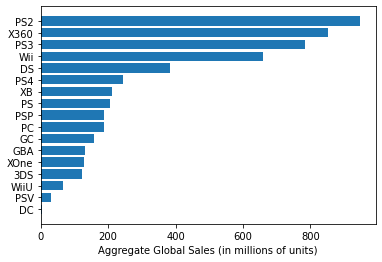

In [22]:
## your code here
df_bar=df.groupby('Console').aggregate('sum')['Global_Sales'].sort_values(ascending=True)
plt.barh(df_bar.index,df_bar)
plt.xlabel('Aggregate Global Sales (in millions of units)')

**Note: The question above does not have any points. Just make sure you know how to plot a bar chart using either matplotlib or pandas.**

**2.4)** Another great way of visulizing the distributed summaries is through the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html).

Create a pivot table from df with the following specs:
1. The pivot table is indexed by **"Console"**, i.e. each row corresponds to one unique game console (PC, PS2, X360, etc.).
2. The pivot table has column names corresponding to each unique **genre** (Action, Adventure, etc.).
3. Each cell in the pivot table contains the **sum of the "Global_Sales"** over all rows in df with the corresonding console and genre.

<!--
BEGIN QUESTION
name: q24
manual: false
points: 4
-->

In [23]:
## Your code here
pivot_GlobalSales = pd.pivot_table(df[['Console','Genre','Global_Sales']],index='Console',columns='Genre',aggfunc='sum')
pivot_GlobalSales

Global_Sales                                                     \
Genre         Action Adventure Fighting    Misc Platform Puzzle  Racing   
Console                                                                   
3DS            30.81      2.00     2.63    4.48    27.61   2.63   13.89   
DC               NaN      1.33     0.56     NaN     0.12    NaN    0.20   
DS             42.43      8.83     3.37   68.82    55.02  50.50   29.93   
GBA            23.21      4.54     3.28    8.59    40.36   5.47   12.60   
GC             29.99      4.56    15.81   12.72    24.67   3.31   11.09   
PC             25.45      1.42     0.13    3.02     0.46   0.19    3.18   
PS             54.93      1.10    18.91    5.66    18.92   0.26   34.17   
PS2           238.73     10.74    64.72   38.70    52.34   3.97  127.17   
PS3           262.38     16.18    47.83   26.59    20.91   0.40   62.17   
PS4            76.92      3.09     6.86    2.70     6.16   0.03    9.08   
PSP            43.92      2.81    12.36    5.09    10.84   2.04   27.88   
PSV             9.53      1.28     1.91    1.81     2.49   0.12    1.00   
Wii            75.75      7.72    21.89  149.42    78.25   8.22   48.35   
WiiU           13.61      0.08     1.22   10.93    21.33   1.30    7.09   
X360          209.90     11.52    35.30   70.09    10.26   0.36   56.14   
XB             36.53      1.98    10.92    3.56     7.44   0.10   23.44   
XOne           29.07      1.57     2.25    4.08     0.62    NaN    8.84   

                                                          
Genre   Role-Playing Shooter Simulation  Sports Strategy  
Console                                                   
3DS            18.94    1.02      16.08    2.20     0.94  
DC              0.68    0.05       0.52    1.09      NaN  
DS             60.31    6.40      42.71    6.01     8.00  
GBA            21.00    1.40       2.03    5.93     3.34  
GC             12.48   13.04       8.39   19.91     3.45  
PC             44.68   36.34      40.34    6.54    25.37  
PS             44.07    5.86       1.67   20.75     0.25  
PS2            77.30   98.20      34.01  191.88     8.21  
PS3            64.00  174.54       7.91   98.20     3.19  
PS4            18.18   63.67       0.72   55.16     0.46  
PSP            31.11   18.52       4.61   25.34     3.40  
PSV             7.02    3.88        NaN    1.84      NaN  
Wii            11.01   19.20      23.88  213.53     1.76  
WiiU            1.26    5.56       0.20    2.39     1.11  
X360           68.62  260.35      13.02  109.74     8.00  
XB             12.50   60.33       6.60   46.75     1.92  
XOne            8.21   48.12       0.01   26.59     0.21

In [24]:
grader.check("q24")

q24 passed!

## 3. Linear Regression

<br>

In this part, you will use linear regression to build a model for **predicting a game's global sales** using different sets of features. 

*Note: For this part, you are not allowed to use scikit-learn tools.*

### 3.a Using Only One Feature

<br>

**3.a.1)** In linear regression, the goal is to find the "best" linear model that fits the data. Assume that we only want to use **"Critic_Score"** to predict the global sales. 

The input `x` (critic scores) and the output `y` (global sales) are given to you below. Follow the simple linear regression procedure in these [slides](https://datax.berkeley.edu/wp-content/uploads/2020/09/slides-m100-linear-regression.pdf) and find the slope ```m``` and the intercept ```y_0```.


<!--
BEGIN QUESTION
name: q3a1
manual: false
points: 4
-->

In [25]:
x = df['Critic_Score']
y = df['Global_Sales']

np.cov(x,y)[0,1]

6.468677585895935

In [26]:
x = df['Critic_Score']
y = df['Global_Sales']

## your code here 
cov_xy=np.cov(x,y)[0,1]
E_x=x.mean()
E_y=y.mean()

y_0 = E_y-(cov_xy/x.var())*E_x
m = cov_xy/x.var()
print(m)
print(y_0)

0.033631945535183505
-1.5857972897132242


In [27]:
grader.check("q3a1")

q3a1 passed!

**3.a.2)** We have trained our model on the entire dataset. As a measure for training error, compute the **mean squared error** and store it in ```train_error_a```. Later, you will compare these errors for different models to see how they perform with respect to each other (on the training dataset).

<!--
BEGIN QUESTION
name: q3a2
manual: false
points: 4
-->

In [28]:
# your code here
y_pred=m*x+y_0
train_error_a = np.mean(np.square(y_pred-y))
print(train_error_a)

3.6370204112621347


In [29]:
grader.check("q3a2")

q3a2 passed!

**3.a.3)** Below, we have drawn a scatter plot of the output $y$ vs the input $x$ as well as the linear regression line. Try to reproduce this plot. Specs of the plot:

  >1. title: 'Global Sale vs Critic Score'
  >2. x-label: 'Critic Score'
  >3. y-labels:  'Global Sale'

<img src="./Global Sale vs Critic Score.png">

<!--
BEGIN QUESTION
name: q3a3
manual: false
points: 0
-->

In [30]:
df.columns

Index(['Name', 'Console', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Total_Sales'],
      dtype='object')

Text(0, 0.5, 'Global Sale')

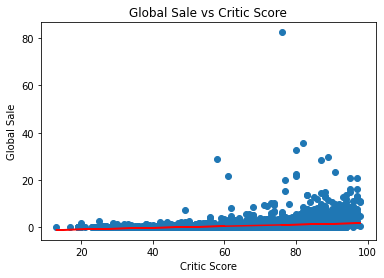

In [31]:
## your code here
plt.scatter(df["Critic_Score"],df["Global_Sales"])
plt.plot(x,y_pred,'r')
plt.title('Global Sale vs Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Global Sale')

**Note: The question above does not have any points. Just make sure you know how to plot a scatter plot using either matplotlib or pandas.**

### 3.b Using More Features 

<br>

**3.b.1)** Let's include three more features into our regression model. So we will use **"Critic_Score", "Critic_Count", "User_Score", and "User_Count"** to train our model. 

The input `x` and the output `y` are given to you below. Note that `x` has **5 columns**, the first four columns correspond to the four features we want to use and the last column, a **column of ones**, corresponds to the **intercept or the bias term**. Follow the linear regression procedure for multi-dimensional input in these [slides](https://datax.berkeley.edu/wp-content/uploads/2020/09/slides-m100-linear-regression.pdf), find the corresponding weight vector, and store it in ```W_b```. 

<!--
BEGIN QUESTION
name: q3b1
manual: false
points: 4
-->

In [32]:
x = df[['Critic_Score' , 'Critic_Count', 'User_Score', 'User_Count']].values
x = np.concatenate((x, np.ones((x.shape[0],1))), axis=1)
y = df['Global_Sales'].values

## your code here
W_b = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(W_b)

[ 2.00065164e-02  1.85736669e-02 -4.35734022e-02  5.37083200e-04
 -9.46405455e-01]


In [33]:
grader.check("q3b1")

q3b1 passed!

**3.b.2)** What we hope is to get a **mean squared error** (on the training data) lower than the one computed in the previous part. Could we get a higher error? Why? (You don't need to write any answers.)

Compute the **mean squared error** for this new model and assign it to ```train_error_b```.

<!--
BEGIN QUESTION
name: q3b2
manual: false
points: 4
-->

In [34]:
# your code here
y_predb = np.matmul(x, W_b)
train_error_b = np.mean(np.square(y_predb-y))
print(train_error_b)

3.368861313060665


In [35]:
grader.check("q3b2")

q3b2 passed!

### 3.c Dummy Variables

<br>

Besides a few continuous features, like **Critic_Score**, we have a few valuable discrete features (e.g. Console, Genre, and Rating) that could be encoded into what is recognized by the linear regression model: **the dummy variables**. 

A dummy variable (aka an indicator variable) is a numeric variable representing categorical data such as Console or Genre in our dataset. They take only the value 0 or 1 to indicate the absence or presence of a qualitative attribute. 

To represent a categorical variable that can take $n$ different values, we need to define $n-1$ dummy variables. let's say we are looking at some animal pictures and each picture features either a cat, a dog, or an elephant! We can represent what each picture features by introducing two dummy variables $x_0$ and $x_1$:

$x_0=1$ if it's a picutre of a cat; $x_0=0$ otherwise.

$x_1=1$ if it's a picutre of a dog; $x_1=0$ otherwise.

**Note that we don't need a third dummy variable, because if both $x_0$ and $x_1$ are equal to 0, then we find out that the picture features an elephant.** 

Apart from being redundant, a third dummy variable creates the [dummy variables trap](https://www.algosome.com/articles/dummy-variable-trap-regression.html#:~:text=The%20Dummy%20Variable%20trap%20is,%2Ffemale%20as%20an%20example). We can generate dummy variables using the function [get_dummes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) in pandas. **Make sure you understand the option "drop_first=True".** 


Let's generate a dataframe containing the dummy variables. We name it **"df_with_dummies"**.

In [36]:
## Run this cell without any modifications
dummy_Genre = pd.get_dummies(df["Genre"], drop_first=True)
dummy_Console = pd.get_dummies(df["Console"],drop_first=True)
dummy_Rating = pd.get_dummies(df["Rating"],drop_first=True)
df_with_dummies = pd.concat([df,dummy_Genre,dummy_Console,dummy_Rating],axis=1)
df_with_dummies.head(5)

,Name,Console,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,WiiU,X360,XB,XOne,E,E10+,K-A,M,RP,T
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,0,0,0,0,1,0,0,0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,0,0,0,0,1,0,0,0,0,0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,...,0,0,0,0,1,0,0,0,0,0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,...,0,0,0,0,1,0,0,0,0,0


**3.c.1)** Let's take these dummy variables into account. This way, we would have **37 features** to build our regression model. 

Again, the input `x` (a matrix with **38 columns**) and the output `y` are given to you below. Build your regression model, and store the optimal weights in ```W_c```.

<!--
BEGIN QUESTION
name: q3c1
manual: false
points: 4
-->

In [37]:
x = df_with_dummies[['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 
                       'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 
                       'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 
                       'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 
                       'Wii', 'WiiU', 'X360', 'XB', 'XOne', 'E', 'E10+', 'K-A', 'M', 'RP','T']].values
x = np.concatenate((x, np.ones((x.shape[0],1))), axis=1)
y = df_with_dummies['Global_Sales'].values

## your code here
W_c = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(W_c)

[ 2.40042468e-02  2.15330259e-02 -7.55898176e-02  7.17016088e-04
 -2.49150811e-01 -3.51196898e-02  2.82091750e-01  1.30967604e-02
 -4.36272184e-01  4.30834717e-02 -2.71976600e-01 -3.88747323e-03
  1.51210727e-01 -3.22023177e-02 -2.79421088e-01 -3.95730481e-01
  2.93958054e-01  1.46417344e-02 -1.76190164e-01 -9.67612556e-01
  9.44613478e-01  2.32578695e-01  6.84510910e-03 -3.68690535e-01
 -8.37637122e-02 -3.54729400e-01  8.09706218e-01 -2.91207521e-01
 -1.55256400e-01 -3.70682863e-01 -1.72758802e-01 -1.86692354e-01
 -5.40674138e-01 -7.17980388e-01 -5.41522179e-01  5.96184165e-01
 -5.53248552e-01 -5.95163053e-01]


In [38]:
grader.check("q3c1")

q3c1 passed!

**3.c.2)** Again, compute the **mean squared error** and store it in ```train_error_c```.

<!--
BEGIN QUESTION
name: q3c2
manual: false
points: 4
-->

In [39]:
# your code here
y_predc = np.matmul(x, W_c)
train_error_c = np.mean(np.square(y_predc-y))
print(train_error_c)

3.120968386258508


In [40]:
grader.check("q3c2")

q3c2 passed!

Based on the **mean squared error** computed for each model, which one of these models would you choose? **Is this the right way to pick a model?** (You do not need to write any answers.)

### 3.d Testing the Models Against a New Dataset

<br>

Training errors could be misleading, that is a very low training error does not necessarily mean that our model performs well. The only thing a low training error suggests is that our model fits the training data quite well ([overfitting](https://en.wikipedia.org/wiki/Overfitting)), but it doesn't tell us anything about our model's performance on a new dataset. Therefore, in order to choose the best model, we need to use a brand new dataset (test dataset).

We have scraped the web and prepared a new small dataset consisting of four popular titles for **PS4**, released back in 2018: **Red Dead Redemption 2, Marvel's Spider-man, Assassin's Creed Odyssey, and Fifa 18.** 

Read this small dataset by running the following cell. 

In [41]:
## No need for modification, just run this cell
test_dataset_3 = pd.read_csv("HW1_test_dataset_3.csv")
test_dataset_3.head(4)

,Name,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Adventure,Fighting,Misc,Platform,...,WiiU,X360,XB,XOne,E,E10+,K-A,M,RP,T
0,Read Dead Redemption 2 (2018),13.94,97,99,8.5,15475,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Marvel's Spider-man (2018),8.76,87,116,8.7,6539,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Assassin's Creed Odyssey (2018),3.18,83,86,6.4,2947,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,FIFA 18 (2017),11.80,84,68,3.5,1051,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**3.d.1)** Let's start with the game **"Red Dead Redemption 2"**. What are your models predictions for this game's **global sales**?

Create a list ```red_dead_pred``` containing your predictions. 

(Format: red_dead_pred = [part a prediction, part b prediction, part c prediction])

<!--
BEGIN QUESTION
name: q3d1
manual: false
points: 4
-->

In [42]:
## your code here
y_a=(m*test_dataset_3['Critic_Score']+y_0)
red_pred_a=y_a.iloc[0]

x_b = test_dataset_3[['Critic_Score' , 'Critic_Count', 'User_Score', 'User_Count']].values
x_b = np.concatenate((x_b, np.ones((x_b.shape[0],1))), axis=1)
y_b=np.matmul(x_b, W_b)
red_pred_b=y_b[0]

x_c=test_dataset_3.drop('Global_Sales',axis=1).drop('Name',axis=1).values
x_c=np.concatenate((x_c, np.ones((x_c.shape[0],1))), axis=1)
y_c=np.matmul(x_c, W_c)
red_pred_c = y_c[0]

red_dead_pred = [red_pred_a, red_pred_b, red_pred_c]
print(red_dead_pred)

[1.676501427199576, 10.774008262507797, 13.408116232725124]


In [43]:
grader.check("q3d1")

q3d1 passed!

Note that the actual global sales of this game is **13.94 million units**. Which one of the models gave a more accurate prediction? Is that what you expected? (you don't need to write any answers.)

**3.d.2)** Compute the **mean squared error** for **each of these models** using the **new dataset** and store in the list ```test_error_3```.

(Format: test_error_3 = [part a error, part b error, part c error])

<!--
BEGIN QUESTION
name: q3d2
manual: false
points: 4
-->

In [44]:
# your code here
y_actual= test_dataset_3['Global_Sales'].values

test_error_3_a = np.mean(np.square(y_a-y_actual))
test_error_3_b = np.mean(np.square(y_b-y_actual))
test_error_3_c = np.mean(np.square(y_c-y_actual))

test_error_3=[test_error_3_a,test_error_3_b,test_error_3_c]
print(test_error_3)

[80.21845388197016, 26.393877969699503, 21.223977916764362]


In [45]:
grader.check("q3d2")

q3d2 passed!

Based on the test errors you just computed, **which one of the models would you choose?** Compare the training and test errors. Do you approve using the linear regression model for predicting the global sales? (You don't need to write any answers.)


Judging our model based on a **small test dataset** is not a good approach. Remember, we trained our models using **6825 data points**, but we only had **4 data points** to test the models. Furthermore, in many real-world problems, we may not be able to obtain a brand new dataset. You will see in section 4 that how we could resolve these issues by spliting the initial dataset into training and test sets. 

## 4. Data Analysis with scikit-learn

<br>

In this part, you will work with `scikit-learn`, an industry standard package for machine learning applications, to build your linear regression model.

Run the following cell to load the required modules.

In [46]:
## Load the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We want to regress global sales on the 37 features we used in part 3.c. The input matrix `x` (consisting of **37 columns**) and the output `y` (global sales) are given to you below. 

>**Note:** In part 3.c, the input matrix `x` had 38 columns one of which represented the intercept. When using `scikit-learn`, however, the default setting for the linear regression is to calculate the intercept, so we don't need to add a column of ones manually.


In [47]:
## No need for modification, just run this cell
x = df_with_dummies[['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 
                       'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 
                       'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 
                       'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 
                       'Wii', 'WiiU', 'X360', 'XB', 'XOne', 'E', 'E10+', 'K-A', 'M', 'RP','T']]

y = df_with_dummies['Global_Sales'].values

**4.1)** Considering the fact that obtaining a new dataset may not be a feasible option in many real-world problems, in practice, we usually split the original data set into **"training" and "test" datasets**. We use the "training" set to build our model and the "test" set to check the model's performance. (In the next homework, you will see that we actually split the original dataset into three sets: "training", "validation", "test".) You can read more about why we need to do train-test spliting [here](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6).

Use scikit-learn function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the dataset into "training" and "test" sets, and store the result in `x_train`, `x_test`, `y_train`, and `y_test`. 

>**Setting:** Use 10% of the dataset for the test set and let `random_state=2021`.

<!--
BEGIN QUESTION
name: q41
manual: false
points: 3
-->

In [48]:
## Your code here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=2021)

In [49]:
grader.check("q41")

q41 passed!

**4.2)** Use scikit-learn function [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) to build your model using your training set. **Store your model in `model`.**

<!--
BEGIN QUESTION
name: q42
manual: false
points: 3
-->

In [50]:
## Your code here
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
grader.check("q42")

q42 passed!

Now that you have built your model, you can take a look at the model's coefficients, which are given in the attributes **intercept** and **coef**.

In [52]:
## Just run this cell
print(model.coef_)
print(model.intercept_)

[ 2.35094133e-02  2.25613185e-02 -7.25341382e-02  7.04181645e-04
 -2.63490429e-01 -1.62086920e-02  2.89278560e-01  1.13686968e-02
 -4.37637220e-01  6.64130208e-02 -2.73927652e-01 -2.61758926e-02
  1.25653832e-01 -1.90049710e-02 -2.75614610e-01 -4.17787373e-01
  2.23361745e-01 -2.16559677e-02 -2.15138973e-01 -9.96913699e-01
  9.45787089e-01  2.09650428e-01 -2.07773288e-02 -3.65927212e-01
 -1.20752888e-01 -3.98840495e-01  8.22861482e-01 -2.82417503e-01
 -2.28634622e-01 -3.92137134e-01 -2.27421116e-01 -1.46886432e-01
 -4.96977746e-01 -7.01304925e-01 -5.14207024e-01  6.37013308e-01
 -5.14347352e-01]
-0.6120946254575204


How do the above numbers compare to the ones you got in part 3.c? **Why are they different?** (You don't need to write any answers.)

**4.3)** Let's calculate the **mean-squared-error** for the training data using scikit-learn function [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error#sklearn.metrics.mean_squared_error) and store it in `train_error`.



<!--
BEGIN QUESTION
name: q43
manual: false
points: 3
-->

In [53]:
## Your code here
y_pred_train = model.predict(x_train)
train_error = mean_squared_error(y_train, y_pred_train)
print(train_error)

3.3114455107778307


In [54]:
grader.check("q43")

q43 passed!

**4.4)** Now, compute the **mean-squared-error** for the test set and store it in `test_error`.

<!--
BEGIN QUESTION
name: q44
manual: false
points: 3
-->

In [55]:
## Your code here
y_pred_test = model.predict(x_test)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

1.4185189001169036


In [56]:
grader.check("q44")

q44 passed!

Compare the errors you got in the two previous parts with the ones you got in part c. Can you justify why they are not the same? (You don't need to write any answers.)

## End

<br>

Congratulations on finishing the homework! Remember to select Kernel/Restart & Run All before submitting your notebook.

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [57]:
# Save your notebook first, then run this cell to create a pdf for your reference.